## Boundary detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from membership import *

In [2]:
def truncated_gaussian(d, sigma = 7):
    """ Membership function of truncated Gaussian
    Input: 
        - distance from the origin 
    Output: 
        - degree of membership
    """
    if np.abs(d) > 2*sigma:
        return 0
    else:
        return np.exp(-np.square(d)/(2*np.square(sigma)))

def mu_black_function(z):
    """ Membership function of defining "black"
    Input:
        - crisp value: pixel intensity
    Output:
        - degree of membership that the output is black
    """
    return 0 if z > 180 else 1-z/180

def mu_white_function(z):
    """ Membership function of defining "black"
    Input:
        - crisp value: pixel intensity
    Output:
        - degree of membership that the output is black
    """
    return 0 if z < 75 else (z-75)/180

In [3]:
d_range = range(-100,101)
mu_zero = [truncated_gaussian(d) for d in d_range]

In [4]:
file_loc = "../../data/ass2/"
# int16 to deal with distance
frame = np.loadtxt(file_loc+"men.txt",delimiter=",").astype(np.float64)

In [17]:
res = frame.copy()
h, w = res.shape

for m in range(1, h-2):
  for n in range(1, w-2):
    distance = [frame[m+i][n+j] - frame[m][n] for i in range(-1,2) for j in range(-1,2)]
    distance.insert(0,0) # add pseudo neighbor to the beginning of distance list
    z_range = np.arange(0,256)

    # 4 neighbor distance
    mu_zero_d2 = truncated_gaussian(distance[2], 10)
    mu_zero_d4 = truncated_gaussian(distance[4], 10)
    mu_zero_d6 = truncated_gaussian(distance[6], 10)
    mu_zero_d8 = truncated_gaussian(distance[8], 10)

    # Map a Function in NumPy With the numpy.vectorize() Function
    mu_white = np.array([mu_white_function(z5) for z5 in z_range])

    # fuzzy sets for the output
    mu1 = np.minimum(min(mu_zero_d2, mu_zero_d6), mu_white)
    mu2 = np.minimum(min(mu_zero_d6, mu_zero_d8), mu_white)
    mu3 = np.minimum(min(mu_zero_d4, mu_zero_d8), mu_white)
    mu4 = np.minimum(min(mu_zero_d2, mu_zero_d4), mu_white)
    mu5 = np.array([mu_black_function(z5) for z5 in z_range])

    mu = np.maximum.reduce([mu1, mu2, mu3, mu4, mu5])
    z5 = np.floor(sum(mu*z_range)/sum(mu))
    res[m][n] = z5

117.0

True

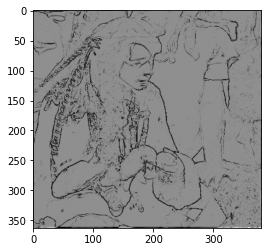

In [18]:
plt.imshow(res,cmap='gray')
cv2.imwrite("../../result/ass2/boundary_10.png", res)